# The Impact of COVID-19 on Airbnb Market in Taipei: Exploratory Analysis
COVID-19 has a massive impact on short-term rental markets around the world. In this project, I'll analyze data from [Inside Airbnb](http://insideairbnb.com/get-the-data.html) for rental listings in Taipei to find out how the market and hosts have responded and adapted their business to the pandemic. Kindly note that I won't put the dataset on my repository because it exceeds the maximum file-size regulated by Github.

Here are the questions I'll try to answer:
- Q1: What is the change in the rental demand for Airbnb?
- Q2: How much did the number of rental demands decline, compared to the same period in 2019?
- Q3: How has COVID-19 impacted the booking rate compared to the same period in 2019?
- Q4: How has COVID-19 impacted the pricing strategy by the hosts compared to the same period in 2019?

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import os
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
def load_data(file_path, index_name):
    data = pd.read_csv(file_path, engine='python', encoding='utf-8')
    return data.set_index(index_name) if len(index_name) > 0 else data

def print_dataset_info(dataset, key_name):
    print('1. %s rows of data, %s columns' % (dataset.shape[0], dataset.shape[1]) )
    print('2. Columns are: %s' % dataset.columns)
    print('3. %s unique %s in the data.' % (dataset[key_name].nunique(), key_name))
    print('4. Is any missing data?')
    print(dataset.isnull().any())

## 1. Dataset Loading
Click the links to download the dataset
- listings.csv compiled on 2020/6/29: [link](http://data.insideairbnb.com/taiwan/northern-taiwan/taipei/2020-06-29/data/listings.csv.gz)
- reviews.csv compiled on 2020/6/29: [link](http://data.insideairbnb.com/taiwan/northern-taiwan/taipei/2020-06-29/data/reviews.csv.gz)
- calendar.csv compiled on 2020/6/29: [link](http://data.insideairbnb.com/taiwan/northern-taiwan/taipei/2020-06-29/data/calendar.csv.gz)
- calendar.csv compiled on 2020/2/29: [link](http://data.insideairbnb.com/taiwan/northern-taiwan/taipei/2020-02-29/data/calendar.csv.gz)
- calendar.csv compiled on 2019/6/30: [link](http://data.insideairbnb.com/taiwan/northern-taiwan/taipei/2019-06-30/data/calendar.csv.gz)
- calendar.csv compiled on 2019/2/24: [link](http://data.insideairbnb.com/taiwan/northern-taiwan/taipei/2019-02-24/data/calendar.csv.gz)

In [3]:
data_listings = load_data('dataset/listings.csv', '')
data_reviews = load_data('dataset/reviews.csv', '')
data_calendar_202006 = load_data('dataset/calendar.csv', '')
data_calendar_201906 = load_data('dataset/calendar_2019.csv', '')
data_calendar_202002 = load_data('dataset/calendar_202002.csv', '')
data_calendar_201902 = load_data('dataset/calendar_201902.csv', '')

## 2. Dataset Exploration

In [4]:
# data_listings
print_dataset_info(data_listings, 'id')
data_listings.head(2)

1. 8103 rows of data, 106 columns
2. Columns are: Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)
3. 8103 unique id in the data.
4. Is any missing data?
id                                              False
listing_url                                     False
scrape_id                                       False
last_scraped                                    False
name                                             True
                                             

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,74641,https://www.airbnb.com/rooms/74641,20200629042806,2020-06-30,黑白雙人房@南京復興站｡小巨蛋斜對面｡溫泉式浴缸｡,"私人衛浴大套房,距南京復興站走路2分鐘｡面對7-11便利商店,旁邊就是南京微風百貨和IKEA...","你的套房裡有清爽安靜的空間,舒服的衛浴設備,無線網路Wi-fi,旅行需要洗衣服也沒問題,有洗...","私人衛浴大套房,距南京復興站走路2分鐘｡面對7-11便利商店,旁邊就是南京微風百貨和IKEA...",none,This area is what we called Business & Residen...,...,f,f,strict_14_with_grace_period,f,f,4,0,4,0,0.47
1,74643,https://www.airbnb.com/rooms/74643,20200629042806,2020-06-30,小巨蛋｡南京復興站溫馨套房,"小巨蛋對面,距南京復興站走路2分鐘｡面對7-11便利商店,旁邊就是南京微風百貨;私人衛浴套房...","歡迎來台北,我們的小提琴工作室就在一旁,如果有興趣,我們很樂意和客人互動! 你的套房裡有清爽...","小巨蛋對面,距南京復興站走路2分鐘｡面對7-11便利商店,旁邊就是南京微風百貨;私人衛浴套房...",none,"微風南京,台北小巨蛋｡ 南京復興捷運站,兄弟飯店,文華飯店｡",...,f,f,strict_14_with_grace_period,f,f,4,0,4,0,0.46


In [5]:
# data_reviews
print_dataset_info(data_reviews, 'listing_id')
data_reviews.head()

1. 270244 rows of data, 6 columns
2. Columns are: Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')
3. 6308 unique listing_id in the data.
4. Is any missing data?
listing_id       False
id               False
date             False
reviewer_id      False
reviewer_name    False
comments          True
dtype: bool


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,74641,730893,2011-11-20,933072,Yixi,3036 is a great find. The place is newly renov...
1,74641,1145534,2012-04-17,2066091,Ryota,"Good location, Number lock (24h doorway), Face..."
2,74641,3643432,2013-02-26,438952,Roy,"As described, good location, clean and comfort..."
3,74641,3810853,2013-03-17,5370009,Herman,My girlfriend and I spent 5 nights here and it...
4,74641,4226835,2013-04-20,1989618,Morgan,"Our stay in Taipei was amazing, in large part ..."


In [6]:
# data_calendar
print_dataset_info(data_calendar_202006, 'listing_id')
print('-----')
print_dataset_info(data_calendar_201906, 'listing_id')
print('-----')
print_dataset_info(data_calendar_202002, 'listing_id')
print('-----')
print_dataset_info(data_calendar_201902, 'listing_id')

1. 2958120 rows of data, 7 columns
2. Columns are: Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')
3. 8103 unique listing_id in the data.
4. Is any missing data?
listing_id        False
date              False
available         False
price              True
adjusted_price     True
minimum_nights     True
maximum_nights     True
dtype: bool
-----
1. 3674528 rows of data, 7 columns
2. Columns are: Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')
3. 10067 unique listing_id in the data.
4. Is any missing data?
listing_id        False
date              False
available         False
price             False
adjusted_price    False
minimum_nights     True
maximum_nights     True
dtype: bool
-----
1. 3668655 rows of data, 7 columns
2. Columns are: Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'm

## 3. Data Cleaning and Transformation

In [7]:
def data_drop_na(dataset, column_name):
    dataset[dataset[column_name].notna()]
    print('Number of Rows in The Original Dataframe:', len(dataset))
    print('Number of Rows After Droping NA', len(dataset[dataset[column_name].notna()]))
    return dataset[dataset[column_name].notna()]

def data_drop_duplicated(dataset):
    print('Number of Rows in The Original Dataframe:', len(dataset))
    print('Number of Rows After Droping DUPLICATED', len(dataset.drop_duplicates()))
    return dataset.drop_duplicates()

In [17]:
def transCalendar(dataset):
    dataset = data_drop_na(dataset, 'price')
    dataset = data_drop_duplicated(dataset)
    
    dataset['booked'] = dataset.available.map(lambda x: 1 if x == 'f' else 0)
    dataset.date = pd.to_datetime(dataset.date)
    dataset['price'] = dataset.price.str.replace('$', '').str.replace(',', '').astype(float)
    
    grouped_total_booked = dataset.groupby('date')['booked'].sum().reset_index().sort_values(by=['date'])
    grouped_total_listings = dataset.groupby('date')['listing_id'].count().reset_index().sort_values(by=['date'])
    grouped_avg_price = dataset.groupby('date')['price'].mean().reset_index().sort_values(by=['date'])
    
    return pd.DataFrame(data = {
        'date': grouped_total_listings.date,
        'year': grouped_total_listings.date.dt.year,
        'month': grouped_total_listings.date.dt.month_name(),
        'comolied_year': grouped_total_listings.date.dt.year.min(),
        'order': grouped_total_listings.date.dt.year*100 + grouped_total_listings.date.dt.month,
        'day_of_week': grouped_total_listings.date.dt.day_name(),
        'total_booked': grouped_total_booked.booked,
        'total_listings': grouped_total_listings.listing_id,
        'occupancy_rate': (grouped_total_booked.booked/grouped_total_listings.listing_id).apply(
            lambda x: round(x*100, 2)),
        'avg_price': grouped_avg_price.price
    })

def transReviews(dataset):
    dataset = data_drop_duplicated(dataset)
    
    dataset.date = pd.to_datetime(dataset.date)
    dataset['year'] = dataset.date.dt.year
    dataset['month'] = dataset.date.dt.month
    dataset['year_month'] = pd.to_datetime(dataset.date)

    grouped_reviews = dataset.groupby(dataset['year_month'].dt.to_period('M'))['listing_id'].count()
    grouped_reviews = grouped_reviews.resample('M').asfreq().fillna(0)

    return pd.DataFrame(data={'date': grouped_reviews.index.strftime('%Y-%m'), 
                              'year': grouped_reviews.index.year,
                              'month': grouped_reviews.index.month,
                              'reviews_count': grouped_reviews.values
                             })

---------
## Q1: What is the change in the rental demand for Airbnb?
In this section, I will look at demand over the years since the inception of Taipei Airbnb in 2011 and across months of the year to understand the trend.

I'm not able to get booking data on Airbnb over the past years. Instead, I use ‘number of reviews’ as a proxy for the demand for Airbnb rentals under the assumption that the review rate is constant over years. Therefore, studying the number of reviews will give us an estimation of the demand.

First, let's get reviews data from 2011 to 2020/06.

In [10]:
reviews = transReviews(data_reviews)

Number of Rows in The Original Dataframe: 270244
Number of Rows After Droping DUPLICATED 270244


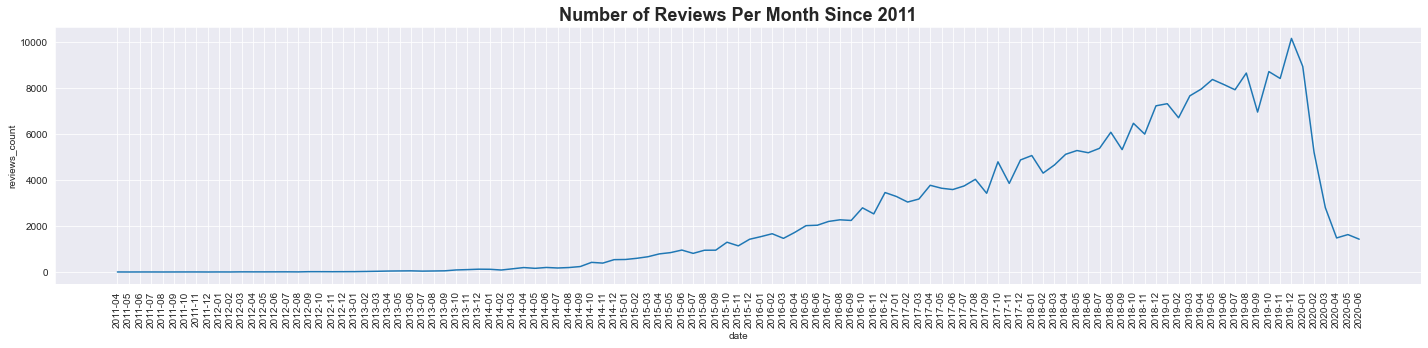

In [11]:
plt.figure(figsize=(20, 5))
sns.set_style('dark')

reviews_trend = sns.lineplot(data=reviews, x='date', y='reviews_count')
reviews_trend.set_title('Number of Reviews Per Month Since 2011', fontsize=18, fontweight='bold')
plt.setp(reviews_trend.get_xticklabels(), rotation=90)
plt.rcParams.update({'font.size': 12})
plt.tight_layout()
plt.grid(True)
plt.show()

**Answer**: 
- Before 2020, the rental demand had increased steadily over the years, an exponential increase in the demand for Airbnb rentals.
- Beginning February in 2020, the rental demand declined sharply due to the COVID-19 outbreak. The demand stopped keeping dropping since April and I think it was something to do with good epidemic prevention in Taiwan.

## Q2: How much did the number of rental demands decline, compared to the same period in 2019?
We realize there was a significant drop in rental demand and I would like to look into it in this section.

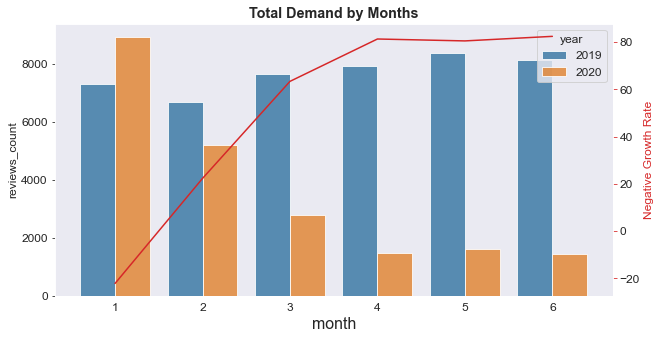

In [12]:
data = reviews[(reviews.year.isin([2019, 2020])) & (reviews.month.isin([1,2,3,4,5,6]))]

reviews_2020 = reviews[(reviews.year == 2020) & (reviews.month.isin([1,2,3,4,5,6]))].reset_index()
reviews_2019 = reviews[(reviews.year == 2019) & (reviews.month.isin([1,2,3,4,5,6]))].reset_index()
reviews_drop = pd.DataFrame({
    'month': reviews_2020.month-1,
    'droping_rate': round(((reviews_2019.reviews_count-reviews_2020.reviews_count)/reviews_2019.reviews_count)*100, 2)
})

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.set_title('Total Demand by Months', fontweight='bold')
ax1.set_xlabel('Month', fontsize=16)
ax1 = sns.barplot(data = data, x='month', y='reviews_count', hue='year', alpha=0.8)
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Negative Growth Rate', color=color)
ax2 = sns.lineplot(x='month', y='droping_rate', data=reviews_drop, color=color)
ax2.tick_params(axis='y', color=color)

plt.show()

**Answer:**
- **January**: The number of rental demands increased by 20% compared to January in 2019. 
- **February to April**: There was a significant drop in the number of rental demands and it was getting worse month by month. The number of rental demands in April decreased by 80% compared to April in 2019.
- **May to June**: The growth rate of rental demands remained around negative 80%.

## Q3: How has COVID-19 impacted the booking rate compared to the same period in 2019?
In this section, I use 4 `calendar.csv` compiled at a different time to explore the booking rate. COVID-19 outbreak started at the end of January 2020. I take the calendar compiled in 2020/2 as the short-term rental market has been impacted by the COVID-19 for one month; take the calendar compiled in 2020/06 as the short-term rental market has been impacted by the COVID-19  for about five months. Next, I also take the calendars compiled in 2019/02 and 2019/06 to look into the change in the booking rate.

Here is the explanation about the variables I declare below:
- calendar_202006: The daily booking status of each listing from 2020/6/29 to 2021/6/29
- calendar_201906: The daily booking status of each listing from 2019/6/30 to 2020/6/29
- calendar_202001: The daily booking status of each listing from 2020/2/1 to 2021/1/30
- calendar_201901: The daily booking status of each listing from 2019/1/30 to 2020/1/30

In [18]:
calendar_202006 = transCalendar(data_calendar_202006)
calendar_201906 = transCalendar(data_calendar_201906)
calendar_202002 = transCalendar(data_calendar_202002)
calendar_201902 = transCalendar(data_calendar_201902)

Number of Rows in The Original Dataframe: 2958120
Number of Rows After Droping NA 2957778
Number of Rows in The Original Dataframe: 2957778
Number of Rows After Droping DUPLICATED 2957778
Number of Rows in The Original Dataframe: 3674528
Number of Rows After Droping NA 3674528
Number of Rows in The Original Dataframe: 3674528
Number of Rows After Droping DUPLICATED 3674528
Number of Rows in The Original Dataframe: 3668655
Number of Rows After Droping NA 3668655
Number of Rows in The Original Dataframe: 3668655
Number of Rows After Droping DUPLICATED 3668655
Number of Rows in The Original Dataframe: 3387930
Number of Rows After Droping NA 3387930
Number of Rows in The Original Dataframe: 3387930
Number of Rows After Droping DUPLICATED 3387930


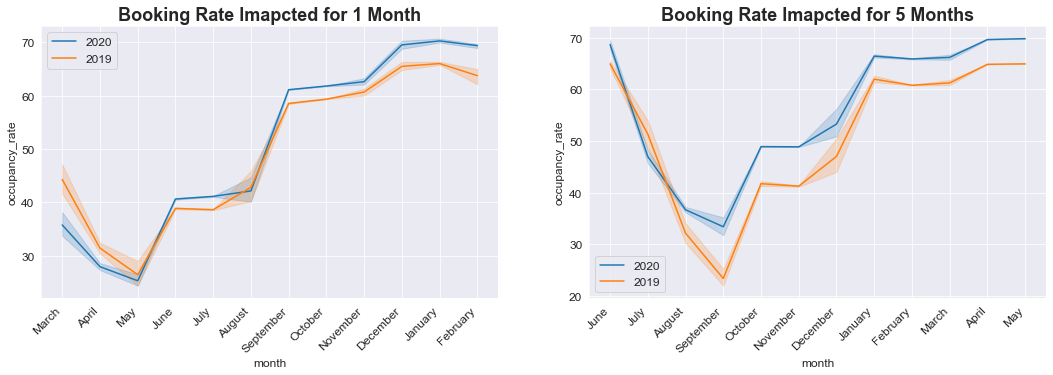

In [20]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
plt.title('Booking Rate Imapcted for 1 Month', fontsize=18, fontweight='bold')
order = [7,8,9,10,11,12,1,2,3,4,5,6]
sns.lineplot(x='month', y='occupancy_rate', data=calendar_202002, label='2020')
sns.lineplot(x='month', y='occupancy_rate', data=calendar_201902, label='2019')
plt.xticks(rotation=45, horizontalalignment='right')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('Booking Rate Imapcted for 5 Months', fontsize=18, fontweight='bold')
sns.lineplot(x='month', y='occupancy_rate', data=calendar_202006, label='2020')
sns.lineplot(x='month', y='occupancy_rate', data=calendar_201906, label='2019')
plt.xticks(rotation=45, horizontalalignment='right')
plt.grid(True)

plt.show()

 **Answer:**
- The left chart shows the booking rate over the next year which has been impacted by COVID-19 for **one** month.
    - This was the time people got panic.
    - Compared to 2019, the booking rate in 2020 for the first three months declined as people avoided going to crowded places by cancelling their travel plans.
- The right chart shows the booking rate over the next year which has been impacted by COVID-19 for **five** months. 
    - The booking rate increased 5 to 10 from August in 2020, compared to the booking rate from August in 2019. 
    - The significant growth of the booking rate implies that the market has turned to be a positive attitude toward the situation of COVID-19. One of the main reasons is the number of people infected remained 0 for days in a row, proven that we had good control over COVID-19 spread so drove more domestic travels then usual after July. In addition, people were unable to go abroad in the near future due to the serious situation in other countries so they turned to have domestic travel.

## Q4: How has COVID-19 impacted the pricing strategy by the hosts compared to the same period in 2019?
In this section, like Q3, I use 4 `calendar.csv` compiled at a different time to explore the pricing strategy. I take the calendar compiled in 2020/2 as the short-term rental market has been impacted by the COVID-19 for one month; the calendar compiled in 2020/06 as the short-term rental market has been impacted by the COVID-19  for about five months. Next, I also take the calendars compiled in 2019/02 and 2019/06 to look into the change in the pricing strategy by the hosts.

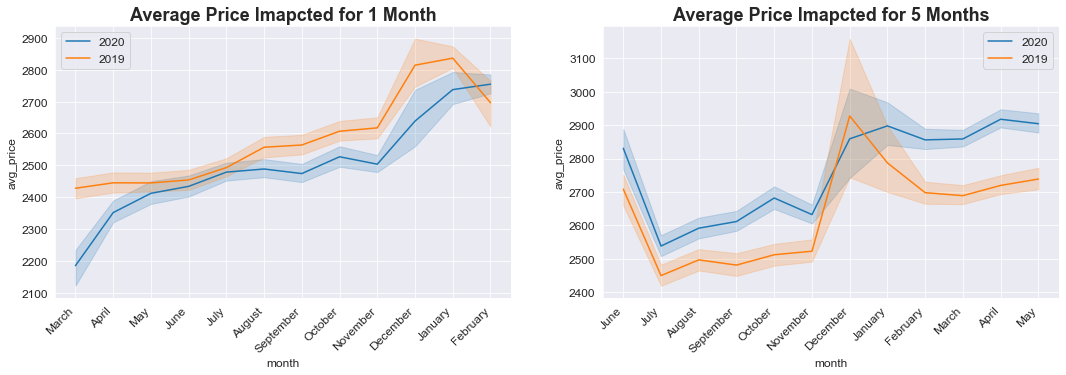

In [21]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
plt.title('Average Price Imapcted for 1 Month', fontsize=18, fontweight='bold');
sns.lineplot(x="month", y="avg_price", data=calendar_202002, label='2020')
sns.lineplot(x="month", y="avg_price", data=calendar_201902, label='2019')
plt.xticks(rotation=45, horizontalalignment='right')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('Average Price Imapcted for 5 Months', fontsize=18, fontweight='bold');
sns.lineplot(x="month", y="avg_price", data=calendar_202006, label='2020')
sns.lineplot(x="month", y="avg_price", data=calendar_201906, label='2019')
plt.xticks(rotation=45, horizontalalignment='right')
plt.grid(True)

plt.show()

 **Answer:**
- The left chart shows the pricing strategy over the next year which has been impacted by COVID-19 for **one** month. 
    - Beginning in March, the average listing prices in 2020 were lower than 2019's. But the gap in the average listing prices between 2020 and 2019 was getting closer from April to July. 
    - Compared to 2019, there was a significant drop in the average price in March by 200.
    - It is reasonable that a decline in demand drives a drop in the listing prices. 
- The right chart shows the pricing strategy over the next year which has been impacted by COVID-19 for around **five** months.
    - The average prices increased by 100 to 200 from June compared to 2019.
    - The reason the listing prices in 2020 were much higher than 2019's is that the hosts expected there would be a gradual increase in the number of rental demands. It is reasonable that an increase in demand drives an increase in the listing prices. 

------
## Summary
COVID-19 has caused long-term economic damage in the world. 
Beginning in late January, the Airbnb rental demand in Taipei took a hit as people stayed home to avoid getting sick, driving the booking rate and listing prices to drop compared to the same period last year.
Fortunately, the analytic results from calendar data in June imply people believed the COVID-19 situation would get better so the Airbnb booking rate form August 2020 exceeds 2019's, which we call it revenge travel.
The Central Epidemic Command Center (CECC) in Taiwan must be given credit for the outstanding pandemic prevention which minimizing the impact of COVID-19 on the economy.